In [1]:
from keras import layers
from keras import models

Using TensorFlow backend.


In [27]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [28]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

In [31]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.shape)

(60000, 28, 28)


In [32]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255.0

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255.0

In [33]:
train_images.shape

(60000, 28, 28, 1)

In [34]:
test_images.shape

(10000, 28, 28, 1)

In [35]:
train_labels.shape

(60000,)

In [36]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [37]:
train_labels.shape

(60000, 10)

In [38]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 7s 122us/step - loss: 0.1696 - accuracy: 0.9467
Epoch 2/5
60000/60000 [==============================] - 7s 119us/step - loss: 0.0462 - accuracy: 0.9855
Epoch 3/5
60000/60000 [==============================] - 7s 118us/step - loss: 0.0318 - accuracy: 0.9901
Epoch 4/5
60000/60000 [==============================] - 7s 118us/step - loss: 0.0241 - accuracy: 0.9925
Epoch 5/5
60000/60000 [==============================] - 7s 118us/step - loss: 0.0184 - accuracy: 0.9946


In [40]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 99us/step


In [41]:
test_acc

0.9925000071525574

## Dogs vs. Cats

In [43]:
import os, shutil

In [44]:
original_dataset_dir = './data/kaggle_original_data'

base_dir = './data/cats_and_dogs_small'
os.mkdir(base_dir)

In [45]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [48]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [54]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'train', fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [55]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'train', fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [56]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'train', fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [57]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'train', fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [58]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'train', fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [59]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'train', fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [61]:
len(os.listdir(train_cats_dir))

1000

In [63]:
len(os.listdir(train_dogs_dir))

1000

In [64]:
len(os.listdir(validation_cats_dir))

500

In [65]:
len(os.listdir(validation_dogs_dir))

500

In [66]:
len(os.listdir(test_cats_dir))

500

In [67]:
len(os.listdir(test_dogs_dir))

500

In [84]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [85]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 15, 15, 128)      

In [86]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [87]:
from keras.preprocessing.image import ImageDataGenerator

In [88]:
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [89]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [90]:
train_generator

In [91]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [92]:
for data_batch, labels_batch in train_generator:
    print(data_batch.shape)
    print(labels_batch.shape)
    break

(20, 150, 150, 3)
(20,)


In [93]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,  # num_batch = 2000 / 20
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)  # num_batch = 1000 / 20

Epoch 1/30
100/100 [==============================] - 15s 149ms/step - loss: 0.6903 - acc: 0.5445 - val_loss: 0.6923 - val_acc: 0.6000
Epoch 2/30
100/100 [==============================] - 15s 146ms/step - loss: 0.6617 - acc: 0.6105 - val_loss: 0.6930 - val_acc: 0.6390
Epoch 3/30
100/100 [==============================] - 15s 147ms/step - loss: 0.6199 - acc: 0.6565 - val_loss: 0.6040 - val_acc: 0.6590
Epoch 4/30
100/100 [==============================] - 15s 147ms/step - loss: 0.5788 - acc: 0.6835 - val_loss: 0.5764 - val_acc: 0.6710
Epoch 5/30
100/100 [==============================] - 15s 148ms/step - loss: 0.5466 - acc: 0.7185 - val_loss: 0.5385 - val_acc: 0.6810
Epoch 6/30
100/100 [==============================] - 15s 147ms/step - loss: 0.5122 - acc: 0.7455 - val_loss: 0.5424 - val_acc: 0.6800
Epoch 7/30
100/100 [==============================] - 15s 147ms/step - loss: 0.4909 - acc: 0.7555 - val_loss: 0.7905 - val_acc: 0.6490
Epoch 8/30
100/100 [==============================] - 1

In [95]:
os.mkdir('models')
model.save('models/cats_and_dogs_small_1.h5')

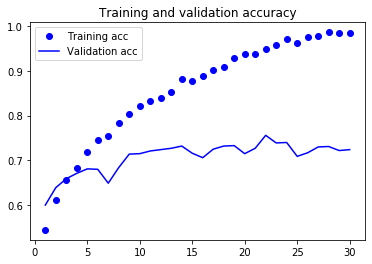

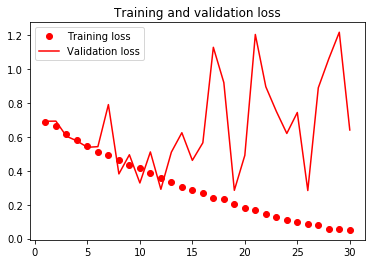

In [98]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# plot accuracy
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

# plot loss
plt.figure()
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Data Augmentation

In [99]:
datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

In [100]:
datagen

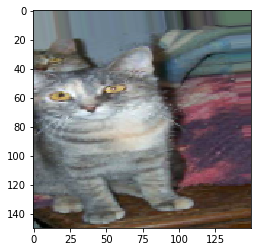

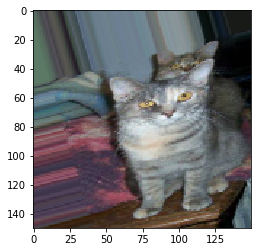

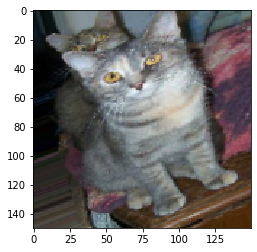

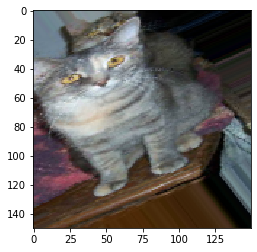

In [113]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [120]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [121]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 15, 15, 128)      

In [122]:
train_datagen = ImageDataGenerator(rescale=1.0 / 255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [123]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/100
100/100 [==============================] - 27s 268ms/step - loss: 0.6922 - acc: 0.5292 - val_loss: 0.6994 - val_acc: 0.5495
Epoch 2/100
100/100 [==============================] - 26s 260ms/step - loss: 0.6816 - acc: 0.5549 - val_loss: 0.6314 - val_acc: 0.6153
Epoch 3/100
100/100 [==============================] - 25s 252ms/step - loss: 0.6684 - acc: 0.5923 - val_loss: 0.5517 - val_acc: 0.6237
Epoch 4/100
100/100 [==============================] - 26s 265ms/step - loss: 0.6629 - acc: 0.6016 - val_loss: 0.6731 - val_acc: 0.6430
Epoch 5/100
100/100 [==============================] - 25s 253ms/step - loss: 0.6321 - acc: 0.6477 - val_loss: 0.7127 - val_acc: 0.5984
Epoch 6/100
100/100 [==============================] - 27s 271ms/step - loss: 0.6201 - acc: 0.6492 - val_loss: 0.6688 - val_acc: 0.6765
Epoch 7/100
100/100 [==============================] - 26s 256ms/step - loss: 0.6168 - acc: 0.6518 - val_loss: 0.5660 - val_acc: 0.6739
Epoch 8/100
100/100 [===========================

In [124]:
model.save('models/cats_and_dogs_small_2.h5')

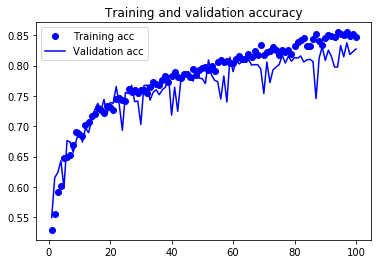

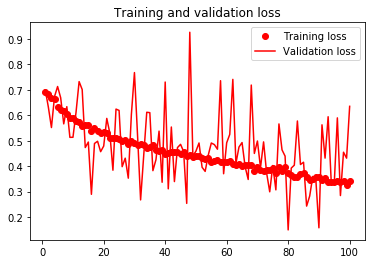

In [125]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# plot accuracy
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

# plot loss
plt.figure()
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## VGG16

In [126]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 34s 1us/step


In [127]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [128]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [129]:
base_dir = './data/cats_and_dogs_small'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [130]:
datagen = ImageDataGenerator(rescale=1.0 / 255)

In [131]:
batch_size = 20

In [134]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory,
                                            target_size=(150, 150),
                                            batch_size=batch_size,
                                            class_mode='binary')
    
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size: (i + 1) * batch_size] = features_batch
        labels[i * batch_size: (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    
    return features, labels

In [136]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [137]:
train_features.shape

(2000, 4, 4, 512)

In [138]:
validation_features.shape

(1000, 4, 4, 512)

In [143]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [144]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 431us/step - loss: 0.6014 - acc: 0.6650 - val_loss: 0.4347 - val_acc: 0.8430
Epoch 2/30
2000/2000 [==============================] - 1s 358us/step - loss: 0.4300 - acc: 0.8075 - val_loss: 0.3539 - val_acc: 0.8760
Epoch 3/30
2000/2000 [==============================] - 1s 384us/step - loss: 0.3601 - acc: 0.8495 - val_loss: 0.3175 - val_acc: 0.8800
Epoch 4/30
2000/2000 [==============================] - 1s 378us/step - loss: 0.3256 - acc: 0.8650 - val_loss: 0.2931 - val_acc: 0.8930
Epoch 5/30
2000/2000 [==============================] - 1s 376us/step - loss: 0.2933 - acc: 0.8805 - val_loss: 0.2764 - val_acc: 0.9000
Epoch 6/30
2000/2000 [==============================] - 1s 389us/step - loss: 0.2617 - acc: 0.8985 - val_loss: 0.2668 - val_acc: 0.8980
Epoch 7/30
2000/2000 [==============================] - 1s 373us/step - loss: 0.2384 - acc: 0.9050 - val_loss: 0.2591 - val_acc: 0.8930


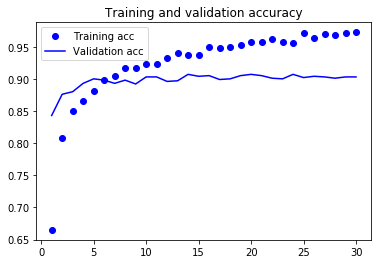

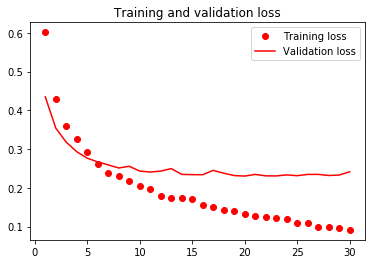

In [145]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# plot accuracy
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

# plot loss
plt.figure()
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [162]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [163]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_8 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [148]:
len(model.trainable_weights)

30

In [150]:
conv_base.trainable = False
len(model.trainable_weights)

4

In [151]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.0 / 255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [152]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

In [153]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_7 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [155]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/30
100/100 [==============================] - 77s 765ms/step - loss: 0.5511 - acc: 0.7408 - val_loss: 0.4414 - val_acc: 0.8484
Epoch 2/30
100/100 [==============================] - 76s 759ms/step - loss: 0.4548 - acc: 0.7965 - val_loss: 0.3359 - val_acc: 0.8679
Epoch 3/30
100/100 [==============================] - 76s 760ms/step - loss: 0.3963 - acc: 0.8327 - val_loss: 0.3528 - val_acc: 0.8731
Epoch 4/30
100/100 [==============================] - 76s 763ms/step - loss: 0.3889 - acc: 0.8342 - val_loss: 0.2418 - val_acc: 0.8892
Epoch 5/30
100/100 [==============================] - 76s 759ms/step - loss: 0.3546 - acc: 0.8456 - val_loss: 0.2289 - val_acc: 0.8871
Epoch 6/30
100/100 [==============================] - 76s 762ms/step - loss: 0.3441 - acc: 0.8502 - val_loss: 0.2442 - val_acc: 0.8963
Epoch 7/30
100/100 [==============================] - 76s 760ms/step - loss: 0.3332 - acc: 0.8595 - val_loss: 0.2382 - val_acc: 0.8997
Epoch 8/30
100/100 [==============================] - 7

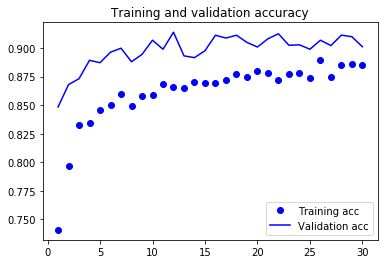

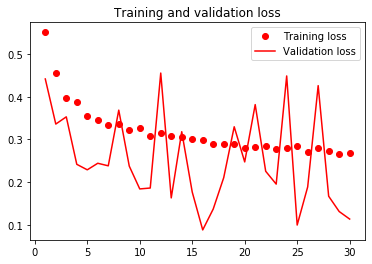

In [156]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# plot accuracy
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

# plot loss
plt.figure()
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [157]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [164]:
conv_base.trainable = True

In [167]:
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [168]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_8 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

## 可視化

In [170]:
from keras.models import load_model

In [171]:
model = load_model('models/cats_and_dogs_small_2.h5')

In [172]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 15, 15, 128)      

In [176]:
img_path = './data/cats_and_dogs_small/test/cats/cat.1700.jpg'

from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.0

In [177]:
img_tensor.shape

(1, 150, 150, 3)

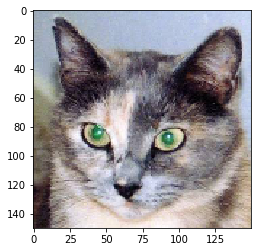

In [178]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

In [179]:
from keras import models

layer_outputs = [layer.output for layer in model.layers[:8]]

activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [180]:
model.layers

In [181]:
activations = activation_model.predict(img_tensor)

In [182]:
len(activations)

8

In [183]:
first_layer_activation = activations[0]
first_layer_activation.shape

(1, 148, 148, 32)

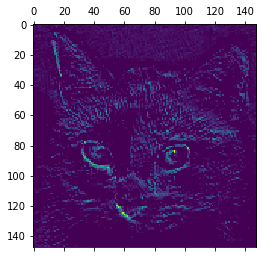

In [192]:
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :, 30], cmap='viridis')
plt.show()

In [193]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

In [194]:
layer_names

['conv2d_22',
 'max_pooling2d_19',
 'conv2d_23',
 'max_pooling2d_20',
 'conv2d_24',
 'max_pooling2d_21',
 'conv2d_25',
 'max_pooling2d_22']

In [196]:
images_per_row = 16

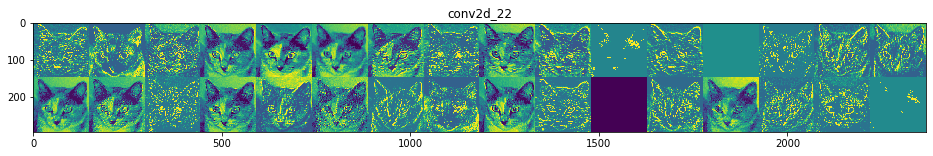

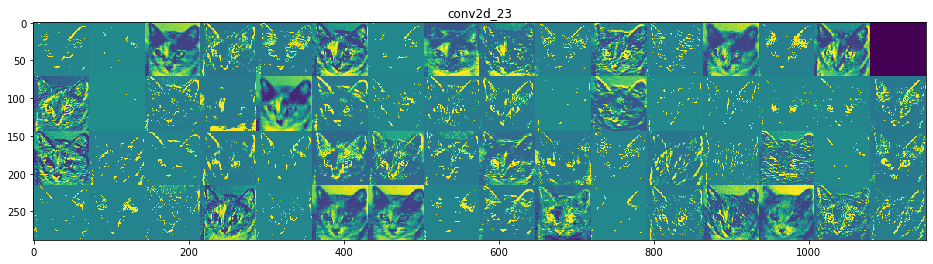

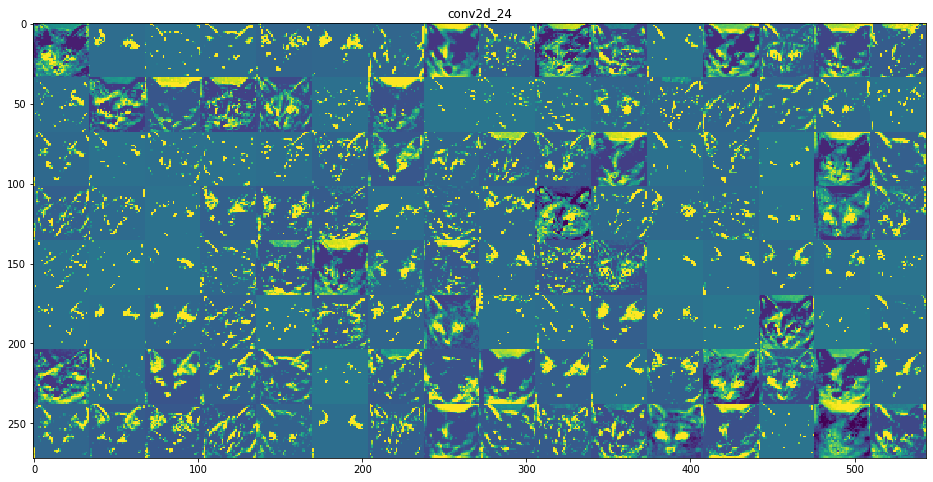

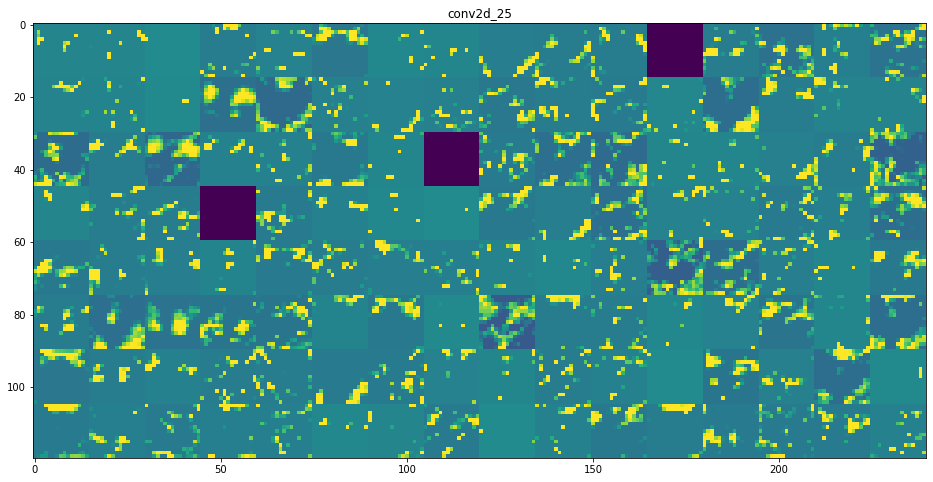

In [207]:
for layer_name, layer_activation in zip(layer_names, activations):
    if 'conv2d' not in layer_name:
        continue

    n_features = layer_activation.shape[-1]
    
    size = layer_activation.shape[1]
    
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size: (col + 1) * size, row * size: (row + 1) * size] = channel_image
    
    scale = 1.0 / size
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

plt.show()

## フィルタの可視化

In [208]:
from keras.applications import VGG16
from keras import backend as K

In [209]:
model = VGG16(weights='imagenet', include_top=False)

In [210]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [212]:
layer_name = 'block3_conv1'
filter_index = 0

layer_output = model.get_layer(layer_name).output

In [213]:
layer_output

<tf.Tensor 'block3_conv1_1/Relu:0' shape=(None, None, None, 256) dtype=float32>

In [214]:
loss = K.mean(layer_output[:, :, :, filter_index])

In [215]:
loss

<tf.Tensor 'Mean_15:0' shape=() dtype=float32>

In [216]:
grads = K.gradients(loss, model.input)[0]

In [217]:
grads

<tf.Tensor 'gradients_13/block1_conv1_1/convolution_grad/Conv2DBackpropInput:0' shape=(None, None, None, 3) dtype=float32>

In [218]:
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

In [219]:
grads

<tf.Tensor 'truediv_128:0' shape=(None, None, None, 3) dtype=float32>

In [220]:
iterate = K.function([model.input], [loss, grads])

In [221]:
import numpy as np
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

In [222]:
loss_value

0.0

In [223]:
grads_value

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)

In [224]:
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128

In [230]:
step = 1.0
for i in range(40):
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value * step

In [231]:
def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    
    x += 0.5
    x = np.clip(x, 0, 1)
    
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [242]:
def generate_pattern(layer_name, filter_index, size=150):
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    
    grads = K.gradients(loss, model.input)[0]
    
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    
    iterate = K.function([model.input], [loss, grads])
    
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.0
    
    step = 1.0
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step

    img = input_img_data[0]
    return deprocess_image(img)

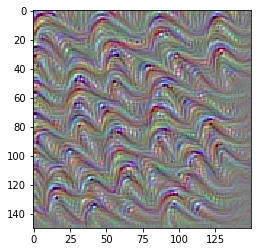

In [255]:
plt.imshow(generate_pattern('block4_conv1', 1))
plt.show()

In [ ]:
for layer_name in ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1']:
    size = 64
    margin = 5

    # This a empty (black) image where we will store our results.
    results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))

    for i in range(8):  # iterate over the rows of our results grid
        for j in range(8):  # iterate over the columns of our results grid
            # Generate the pattern for filter `i + (j * 8)` in `layer_name`
            filter_img = generate_pattern(layer_name, i + (j * 8), size=size)

            # Put the result in the square `(i, j)` of the results grid
            horizontal_start = i * size + i * margin
            horizontal_end = horizontal_start + size
            vertical_start = j * size + j * margin
            vertical_end = vertical_start + size
            results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img

    # Display the results grid
    plt.figure(figsize=(20, 20))
    plt.imshow(results)
    plt.show()

## CAM (Class Activation Map)

In [236]:
from keras.applications.vgg16 import VGG16

In [237]:
model = VGG16(weights='imagenet')

553467904/553467096 [==============================] - 194s 0us/step


In [257]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

In [267]:
img_path = './data/African_Elephant.jpg'

img = image.load_img(img_path, target_size=(224, 224))

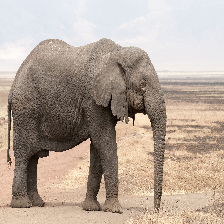

In [268]:
img

In [269]:
x = image.img_to_array(img)

In [270]:
x = np.expand_dims(x, axis=0)

In [271]:
x.shape

(1, 224, 224, 3)

In [272]:
x = preprocess_input(x)

In [273]:
x.shape

(1, 224, 224, 3)

In [274]:
preds = model.predict(x)

In [275]:
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02504013', 'Indian_elephant', 0.48767728), ('n02504458', 'African_elephant', 0.3190899), ('n01871265', 'tusker', 0.19286235)]


In [276]:
np.argmax(preds[0])

385

In [278]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [279]:
african_elephant_output = model.output[:, 386]

last_conv_layer = model.get_layer('block5_conv3')

grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))

iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([x])

In [280]:
for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

In [281]:
heatmap = np.mean(conv_layer_output_value, axis=-1)

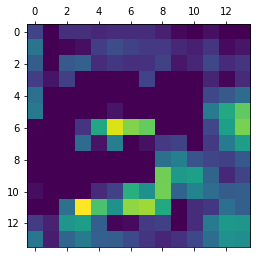

In [282]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

In [283]:
import cv2

img = cv2.imread(img_path)

In [285]:
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

superimposed_img = heatmap * 0.4 + img

In [286]:
cv2.imwrite('data/elephant_cam.jpg', superimposed_img)

True

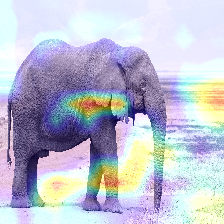

In [288]:
img_path = './data/elephant_cam.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img